### Data Source -  https://www.kaggle.com/janiobachmann/bank-marketing-dataset. 
* The original dataset was sourced from UCI Machine Learning Repository and was contributed by [Moro et al., 2014]. 


In [1]:
#Listing 5-1  - Import required libraries


#Import required libraries
import torch.nn as nn
import torch as tch
import numpy as np, pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import  precision_score, recall_score,roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


In [9]:
#Listing 5-2  - Load data into memory


#Load data into memory using pandas
df = pd.read_csv("Data/bank.csv")
print("DF Shape:",df.shape)
df.head()


DF Shape: (11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [10]:
#Listing 5-3  - Distribution of target values


print("Distribution of Target Values in Dataset -")
df.deposit.value_counts()


Distribution of Target Values in Dataset -


no     5873
yes    5289
Name: deposit, dtype: int64

In [11]:
#Listing 5-4  - Distribution of na (null) values in dataset

#Check if we have 'na' values within the dataset
df.isna().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [12]:
#Listing 5-5  - Distribution of distinct datatypes

#Check the distinct datatypes within the dataset
df.dtypes.value_counts()


object    10
int64      7
dtype: int64

In [13]:
##Listing 5-6  - Extract categorical columns from dataset


#Extract categorical columns from dataset
categorical_columns = df.select_dtypes(include="object").columns
print("Categorical cols:",list(categorical_columns))

#For each categorical column if values in (Yes/No) convert into a 1/0 Flag
for col in categorical_columns:
    if df[col].nunique() == 2:
        df[col] = np.where(df[col]=="yes",1,0)

df.head()


Categorical cols: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [14]:
#Listing 5-7  - Onehot encoding for remaining non-binary categorical variables


#For the remaining cateogrical variables; 
#create one-hot encoded version of the dataset
new_df = pd.get_dummies(df)

#Define target and predictors for the model
target = "deposit"
predictors = set(new_df.columns) - set([target])
print("new_df.shape:",new_df.shape)
new_df[predictors].head()


new_df.shape: (11162, 49)


,default,duration,job_admin.,job_blue-collar,poutcome_failure,job_housemaid,month_jun,education_primary,day,education_secondary,...,housing,education_unknown,campaign,previous,month_mar,poutcome_other,month_dec,job_technician,marital_married,job_unemployed
0,0,1042,1,0,0,0,0,0,5,1,...,1,0,1,0,0,0,0,0,1,0
1,0,1467,1,0,0,0,0,0,5,1,...,0,0,1,0,0,0,0,0,1,0
2,0,1389,0,0,0,0,0,0,5,1,...,1,0,1,0,0,0,0,1,1,0
3,0,579,0,0,0,0,0,0,5,1,...,1,0,1,0,0,0,0,0,1,0
4,0,673,1,0,0,0,0,0,5,0,...,0,0,2,0,0,0,0,0,1,0


In [15]:
#Listing 5-8  - Prepare data for training and validation


#Convert all datatypes within pandas dataframe to Float32 
#(Compatibility with PyTorch tensors)
new_df = new_df.astype(np.float32)

#Split dataset into Train/Test [80:20]
X_train,x_test, Y_train,y_test = train_test_split(new_df[predictors],new_df[target],test_size= 0.2)

#Convert Pandas dataframe, first to numpy and then to Torch Tensors
X_train = tch.from_numpy(X_train.values)
x_test  = tch.from_numpy(x_test.values)
Y_train = tch.from_numpy(Y_train.values).reshape(-1,1)
y_test  = tch.from_numpy(y_test.values).reshape(-1,1)

#Print the dataset size to verify
print("X_train.shape:",X_train.shape)
print("x_test.shape:",x_test.shape)
print("Y_train.shape:",Y_train.shape)
print("y_test.shape:",y_test.shape)



X_train.shape: torch.Size([8929, 48])
x_test.shape: torch.Size([2233, 48])
Y_train.shape: torch.Size([8929, 1])
y_test.shape: torch.Size([2233, 1])


In [16]:
#Listing 5-9  - Define function to train model


#Define function to train the network
def train_network(model,optimizer,loss_function,num_epochs,batch_size
,X_train,Y_train,lambda_L1=0.0):
    loss_across_epochs = []

    for epoch in range(num_epochs):
        train_loss= 0.0

        #Explicitly start model training
        model.train()

        for i in range(0,X_train.shape[0],batch_size):

            #Extract train batch from X and Y
            input_data = X_train[i:min(X_train.shape[0],i+batch_size)]
            labels = Y_train[i:min(X_train.shape[0],i+batch_size)]

            #set the gradients to zero before starting to do backpropragation 
            optimizer.zero_grad()

            #Forward pass
            output_data  = model(input_data)

            #Caculate loss
            loss = loss_function(output_data, labels)
            L1_loss = 0
            
            #Compute L1 penalty to be added with loss 
            for p in model.parameters():
                L1_loss = L1_loss + p.abs().sum()                

            #Add L1 penalty to loss
            loss = loss + lambda_L1 * L1_loss

            #Backpropogate
            loss.backward()

            #Update weights
            optimizer.step()

            train_loss += loss.item() * input_data.size(0)

        loss_across_epochs.append(train_loss/X_train.size(0))
        if epoch%500 == 0:
            print("Epoch: {} - Loss:{:.4f}".format(epoch,train_loss/X_train.size(0) ))    
        
    return(loss_across_epochs)




In [17]:
#Listing 5-10  - Define function to evaluate model

#Define function for evaluating NN
def evaluate_model(model,x_test,y_test,X_train,Y_train,loss_list):

    model.eval() #Explicitly set to evaluate mode

    #Predict on Train and Validation Datasets
    y_test_prob = model(x_test)
    y_test_pred =np.where(y_test_prob>0.5,1,0)
    Y_train_prob = model(X_train)
    Y_train_pred =np.where(Y_train_prob>0.5,1,0)

    #Compute Training and Validation Metrics
    print("\n Model Performance -")
    print("Training Accuracy-",round(accuracy_score(Y_train,Y_train_pred),3))
    print("Training Precision-",round(precision_score(Y_train,Y_train_pred),3))
    print("Training Recall-",round(recall_score(Y_train,Y_train_pred),3))
    print("Training ROCAUC", round(roc_auc_score(Y_train
,Y_train_prob.detach().numpy()),3))

    print("Validation Accuracy-",round(accuracy_score(y_test,y_test_pred),3))
    print("Validation Precision-",round(precision_score(y_test,y_test_pred),3))
    print("Validation Recall-",round(recall_score(y_test,y_test_pred),3))
    print("Validation ROCAUC", round(roc_auc_score(y_test
,y_test_prob.detach().numpy()),3))    
    print("\n")
    
    #Plot the Loss curve and ROC Curve
    plt.figure(figsize=(20,5))
    plt.subplot(1, 2, 1)
    plt.plot(loss_list)
    plt.title('Loss across epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')

    plt.subplot(1, 2, 2)

    #Validation
    fpr_v, tpr_v, _ = roc_curve(y_test, y_test_prob.detach().numpy())
    roc_auc_v = auc(fpr_v, tpr_v)

    #Training
    fpr_t, tpr_t, _ = roc_curve(Y_train, Y_train_prob.detach().numpy())
    roc_auc_t = auc(fpr_t, tpr_t)    

    plt.title('Receiver Operating Characteristic:Validation')
    plt.plot(fpr_v, tpr_v, 'b', label = 'Validation AUC = %0.2f' % roc_auc_v)
    plt.plot(fpr_t, tpr_t, 'r', label = 'Training AUC = %0.2f' % roc_auc_t)    
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    plt.show()



Epoch: 0 - Loss:1.3867

 Model Performance -
Training Accuracy- 0.944
Training Precision- 0.926
Training Recall- 0.957
Training ROCAUC 0.987
Validation Accuracy- 0.815
Validation Precision- 0.796
Validation Recall- 0.817
Validation ROCAUC 0.876




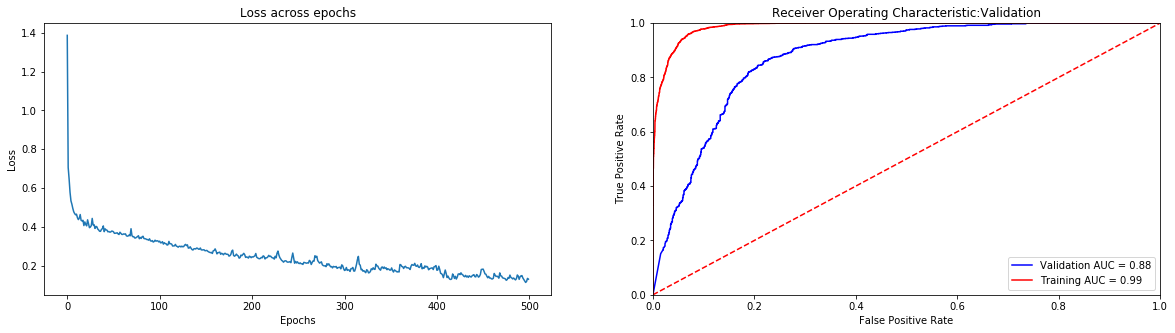

In [18]:
#Listing 5-11  - Define Neural Network


#Define Neural Network

class NeuralNetwork(nn.Module):
    
    def __init__(self):
        super().__init__()
        tch.manual_seed(2020)
        self.fc1 = nn.Linear(48, 96) 
        self.fc2 = nn.Linear(96, 192)
        self.fc3 = nn.Linear(192, 384)
        self.out = nn.Linear(384, 1)        
        self.relu = nn.ReLU()        
        self.final = nn.Sigmoid()

        
    def forward(self, x):
        op = self.fc1(x)
        op = self.relu(op)        
        op = self.fc2(op)
        op = self.relu(op)
        op = self.fc3(op)
        op = self.relu(op)
        op = self.out(op)
        y = self.final(op)
        return y
    
#Define training variables
num_epochs = 500
batch_size= 128
loss_function = nn.BCELoss()  #Binary Crosss Entropy Loss

#Hyperparameters
weight_decay=0.0 #set to 0; no L2 Regularizer; passed into the Optimizer
lambda_L1=0.0    #Set to 0; no L1 reg; manually added in loss (train_network)

#Create a model instance
model = NeuralNetwork()

#Define optimizer
adam_optimizer = tch.optim.Adam(model.parameters(), lr= 0.001,weight_decay=weight_decay)

#Train model
adam_loss = train_network(model,adam_optimizer,loss_function
,num_epochs,batch_size,X_train,Y_train,lambda_L1=0.0)

#Evaluate model
evaluate_model(model,x_test,y_test,X_train,Y_train,adam_loss)


Epoch: 0 - Loss:2.3865

 Model Performance -
Training Accuracy- 0.862
Training Precision- 0.821
Training Recall- 0.907
Training ROCAUC 0.937
Validation Accuracy- 0.821
Validation Precision- 0.784
Validation Recall- 0.86
Validation ROCAUC 0.896




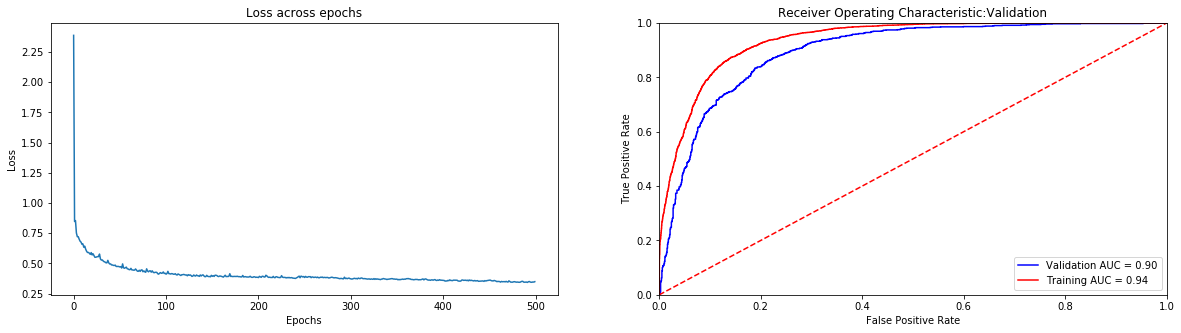

In [19]:
#Listing 5-12  - L1 Regularization
#L1 Regularization    
num_epochs = 500
batch_size= 128

weight_decay=0.0   #Set to 0; no L2 reg
lambda_L1 = 0.0001 #Enables L1 Regularization

model = NeuralNetwork()
loss_function = nn.BCELoss()  #Binary Crosss Entropy Loss

adam_optimizer = tch.optim.Adam(model.parameters(),lr= 0.001 ,weight_decay=weight_decay)

#Define hyperparater for L1 Regularization
#Train network
adam_loss = train_network(model,adam_optimizer,loss_function ,num_epochs,batch_size
,X_train,Y_train,lambda_L1=lambda_L1)

#Evaluate model
evaluate_model(model,x_test,y_test,X_train,Y_train,adam_loss)



In [ ]:
#Listing 5-13  - L2 Regularization

#L2 Regularization    
num_epochs = 500
batch_size= 128
weight_decay=0.001 #Enables L2 Regularization	
lambda_L1 = 0.00    #Set to 0; no L1 reg

model = NeuralNetwork()
loss_function = nn.BCELoss()  #Binary Crosss Entropy Loss

adam_optimizer = tch.optim.Adam(model.parameters(),lr= 0.001,weight_decay=weight_decay)

#Train Network
adam_loss = train_network(model,adam_optimizer,loss_function,num_epochs,batch_size
,X_train,Y_train,lambda_L1=lambda_L1)

#Evaluate model
evaluate_model(model,x_test,y_test,X_train,Y_train,adam_loss)
    


Epoch: 0 - Loss:1.6601

 Model Performance -
Training Accuracy- 0.872
Training Precision- 0.861
Training Recall- 0.871
Training ROCAUC 0.945
Validation Accuracy- 0.849
Validation Precision- 0.839
Validation Recall- 0.843
Validation ROCAUC 0.919




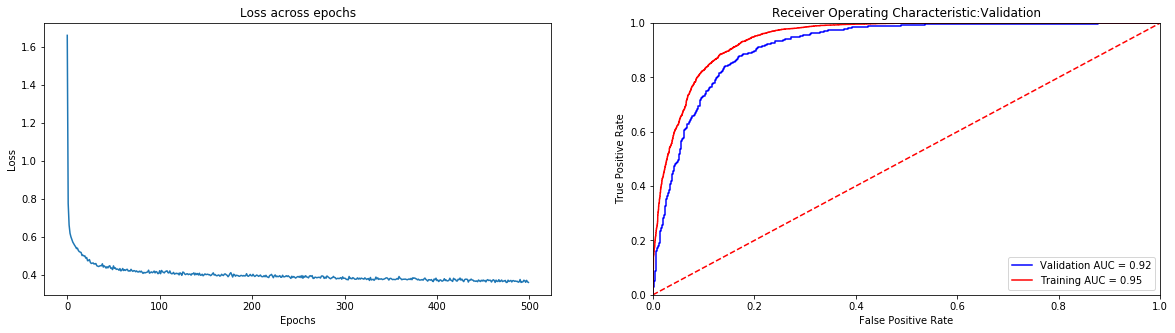

In [20]:
#Listing 5-14  - Dropout Regularization


#Define Network with Dropout Layers
class NeuralNetwork(nn.Module):
    #Adding droput layers within Neural Network to reduce overfitting
    def __init__(self):
        super().__init__()
        tch.manual_seed(2020)
        self.fc1 = nn.Linear(48, 96)
        self.fc2 = nn.Linear(96, 192)
        self.fc3 = nn.Linear(192, 384)
        self.relu = nn.ReLU()
        self.out = nn.Linear(384, 1)
        self.final = nn.Sigmoid()
        self.drop = nn.Dropout(0.1)  #Dropout Layer


        
    def forward(self, x):
        op = self.drop(x)  #Dropout for input layer
        op = self.fc1(op)
        op = self.relu(op)        
        op = self.drop(op) #Dropout for hidden layer 1
        op = self.fc2(op)
        op = self.relu(op)
        op = self.drop(op) #Dropout for hidden layer 2
        op = self.fc3(op)
        op = self.relu(op)      
        op = self.drop(op) #Dropout for hidden layer 3       
        op = self.out(op)
        y = self.final(op)
        return y
    
num_epochs = 500
batch_size= 128

weight_decay=0.0 #Set to 0; no L2 reg
lambda_L1 = 0.0  #Set to 0; no L1 reg


model = NeuralNetwork()
loss_function = nn.BCELoss()  #Binary Crosss Entropy Loss

adam_optimizer = tch.optim.Adam(model.parameters(),lr= 0.001
,weight_decay=weight_decay)
#Train model
adam_loss = train_network(model,adam_optimizer,loss_function,num_epochs
,batch_size,X_train,Y_train
,lambda_L1= lambda_L1)

#Evaluate model
evaluate_model(model,x_test,y_test,X_train,Y_train,adam_loss)
    


Epoch: 0 - Loss:1.9866

 Model Performance -
Training Accuracy- 0.821
Training Precision- 0.83
Training Recall- 0.782
Training ROCAUC 0.903
Validation Accuracy- 0.81
Validation Precision- 0.821
Validation Recall- 0.765
Validation ROCAUC 0.901




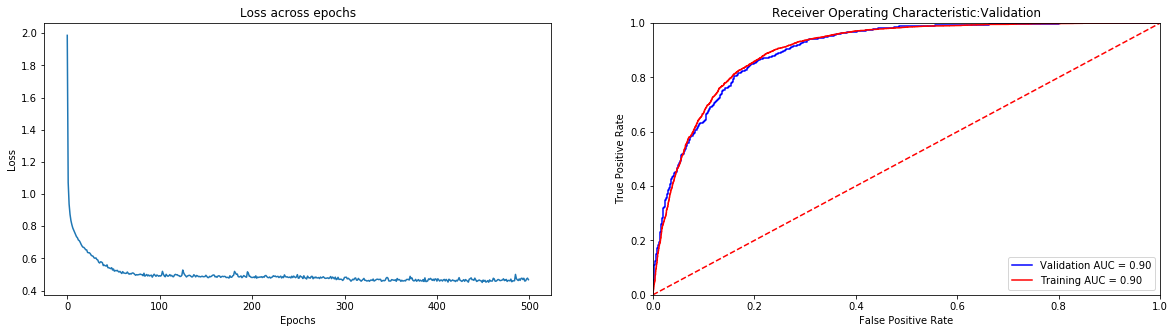

In [21]:
#Listing 5-15  - L1, L2 + Dropout Regularization


#Create a network with Dropout layer
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        tch.manual_seed(2020)
        self.fc1 = nn.Linear(48, 96)
        self.fc2 = nn.Linear(96, 192)
        self.fc3 = nn.Linear(192, 384)
        self.relu = nn.ReLU()
        self.out = nn.Linear(384, 1)
        self.final = nn.Sigmoid()
        self.drop = nn.Dropout(0.1)  #Dropout Layer


        
    def forward(self, x):
        op = self.drop(x)  #Dropout for input layer
        op = self.fc1(op)
        op = self.relu(op)        
        op = self.drop(op) #Dropout for hidden layer 1
        op = self.fc2(op)
        op = self.relu(op)
        op = self.drop(op) #Dropout for hidden layer 2
        op = self.fc3(op)
        op = self.relu(op)      
        op = self.drop(op) #Dropout for hidden layer 3       
        op = self.out(op)
        y = self.final(op)
        return y
    
num_epochs = 500
batch_size= 128

lambda_L1    = 0.0001  #Enabled L1 
weight_decay =0.001    #Enabled L2

model = NeuralNetwork()
loss_function = nn.BCELoss()

adam_optimizer = tch.optim.Adam(model.parameters(),lr= 0.001 ,weight_decay=weight_decay)

adam_loss = train_network(model,adam_optimizer,loss_function ,num_epochs,batch_size
,X_train,Y_train,lambda_L1=lambda_L1)

evaluate_model(model,x_test,y_test,X_train,Y_train,adam_loss)
